# Lecture 6 - Introduction to Machine Learning (ML I)





![ha-ha-ha!](https://imgs.xkcd.com/comics/machine_learning.png)

## Learning Objectives
- Understand the principles of **machine learning (ML)** is and when to use it.
- Distinguish **supervised** vs **unsupervised** learning (with a clear notion of *labels*).
- Understand **classification vs regression** tasks.
- Understand a typical **ML pipeline**: feature engineering: train/test splits, model selection, validation.
- Build first models with scikit-learn: **Linear Regression** and **Decision Trees**.

# Introduction to Machine Learning (ML I)

## What is Machine Learning?

Machine Learning (ML) is the field of building models that learn patterns from data.  In our case (chemical engineering),
instead of explicitly programming rules of physics/nature, we train algorithms to generalize from examples/experimental data.

**Why ML?**
- Make predictions on unseen data.
- Discover patterns in complex systems.
- Aid scientific discovery and engineering applications.
- Sometimes, the models that come from first principles can't fully describe the process we are studying (The simplifications made the model a weak representation of reality.)



## Types of Machine Learning

### Supervised Learning
- Data comes with **labels** (target outputs).
- Examples: predicting new values of measurements based on previous sensor data and inputs in a chemical plant

### Unsupervised Learning
- Data has **no labels**.
- Goal: find hidden structure.
- Examples: clustering, dimensionality reduction.

### Classification vs Regression
- **Classification**: predict discrete categories (yes/no, faulty/not faulty, category A/category B, etc.).
- **Regression**: predict continuous values (temperature, pressure, flow rates, etc.).


## ML Types: Schematic

Original image from [this paper](https://doi.org/10.3389/fphar.2021.720694). [CC BY 4.0 License](https://creativecommons.org/licenses/by/4.0/)

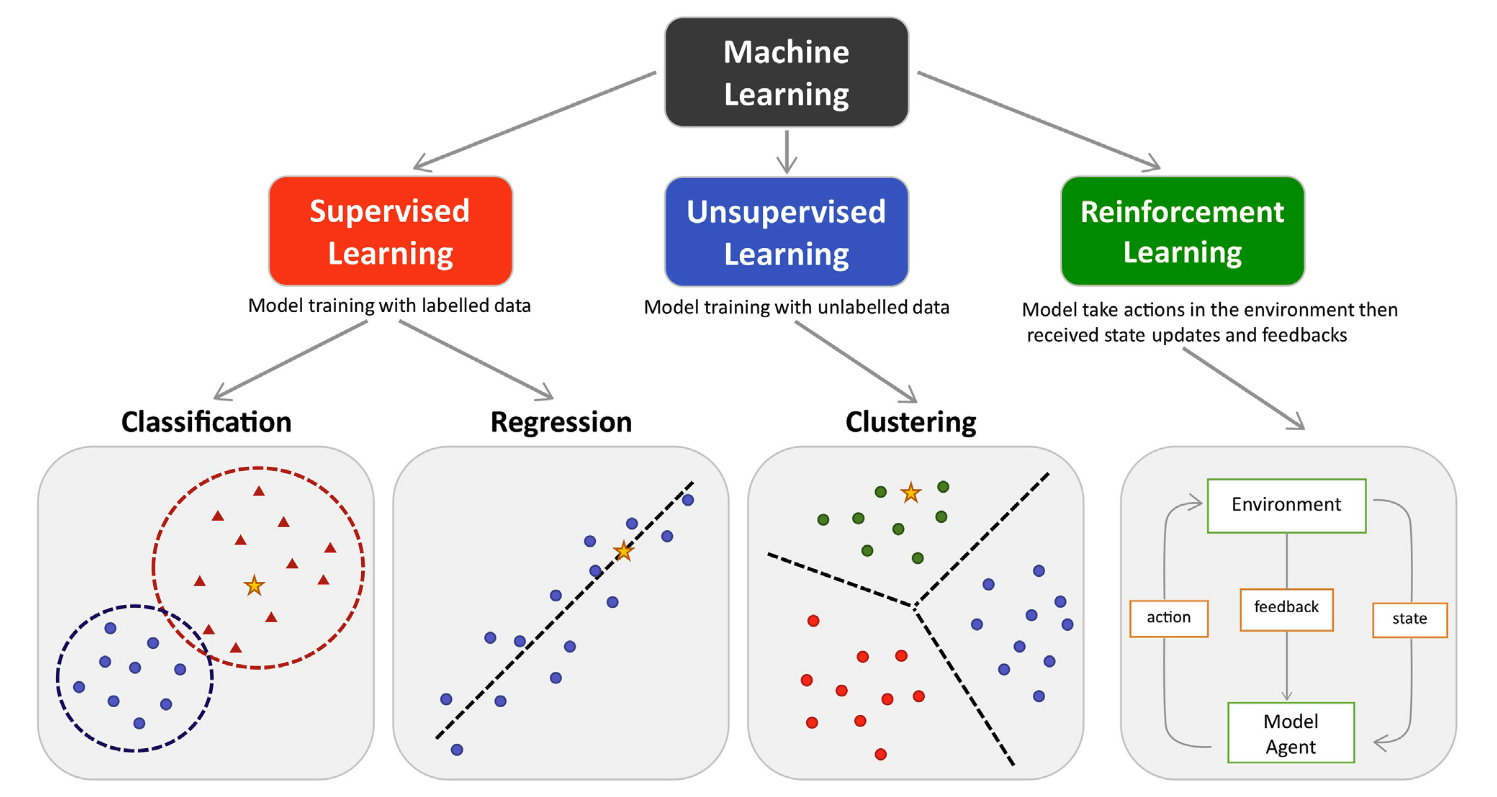

Most of the problems in chemical engineering will fall into the supervised learning/regression category. However, in process control, applications of reinforcement learning and classification (e.g., fault diagnosis) are not uncommon.

## Some terminology, common terms used in ML

ML is a bit jargonized. Let's clarify most of the terms used before we move on:

- **Sample (observation, instance, row):**  
  A single data point in the dataset.  
  *Example:* One measurement of water at 50 °C and its pressure.

- **Feature (input, independent variable, X):**  
  The input variables used by the model.  
  *Example:* Temperature, pressure.

- **Target (output, label, dependent variable, y):**  
  The value the model is trying to predict.  
  *Example:* Pressure (regression) or Phase A vs Phase B (classification).

- **Model:**  
  The mathematical function or algorithm that maps features → target.  
  *Examples:* Linear Regression, Decision Tree.

- **Training set:**  
  Subset of data used to fit the model parameters.

- **Test set:**  
  Subset of data held back to evaluate how well the trained model generalizes.

- **Prediction (ŷ):**  
  The model’s estimated value for the target given new features.

- **Error (residual):**  
  Difference between actual target and predicted value:  $  y - \hat{y} $

## The ML Pipeline

Machine learning is not just about fitting a model.  
It follows a structured **workflow**:

1. **Feature Engineering**  
   - Select or transform input variables (`X`).
   - Example: using polynomial features of temperature.

2. **Data Splitting**  
   - Training set: Used to fit the model.    
   - Test set: Used to evaluate performance with unseen data.  

   ```python
   from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

3. **Model Selection**  
   - Choose appropriate ML algorithms (linear models, trees, etc.).

4. **Model Validation**  
   - Prevent overfitting.  
   - Use metrics such as:
     - Regression: $R^2$, Mean Squared Error (MSE).
     - Classification: Accuracy, F1 score.  

   - Two types of validation can be performed: Hold-out and cross-validation
   - Hold-out validation is the most popular one. You hold a percentage of the original dataset for validation/testing purposes. This is the one we will be doing today.
   - Cross-validation is often used for robust evaluation.





# Common Machine Learning Metrics

Evaluation metrics tell us **how well a model is performing**.  
Choosing the right one depends on the **type of task** (regression vs classification) and the **goal** (error minimization, class balance, interpretability).


## Regression Metrics

### 1. $R^2$ — Coefficient of Determination
- Measures the proportion of variance in the target explained by the model.  
- Range: $-\infty, 1$ (1 = perfect fit).  


$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$




### 2. MSE — Mean Squared Error
- Average of squared differences between actual and predicted values.  

$$
MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$

- **When to use:**  
  - Penalizes large errors more strongly (squaring).  
  - Standard in regression tasks where outliers matter.  
- **Limitation:**  
  - Units are squared (e.g., °C², atm²) — not directly interpretable.



### 3. MAE — Mean Absolute Error
- Average of absolute differences between actual and predicted values.  

$$
MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|
$$

- **When to use:**  
  - More interpretable (same units as target).  
  - Less sensitive to outliers than MSE.  
- **Limitation:**  
  - Doesn’t penalize large errors as harshly as MSE.



## Scikit-learn

We will be using scikit-learn to train and simulate our ML models in this class. "Why?" you may ask. In short, scikit-learn is one of the most popular ML packages in Python, and it has quite an extensive library of ML models, a really thorough documentation including examples. Lastly, it does have a consistent syntax among algorithms. This means that most of the algorithms/code we will be using follow the same terminology.

Scikit-learn also contains a broad set of useful functions to split datasets, perform validation, and so on.


Let's take a look at https://scikit-learn.org/stable/



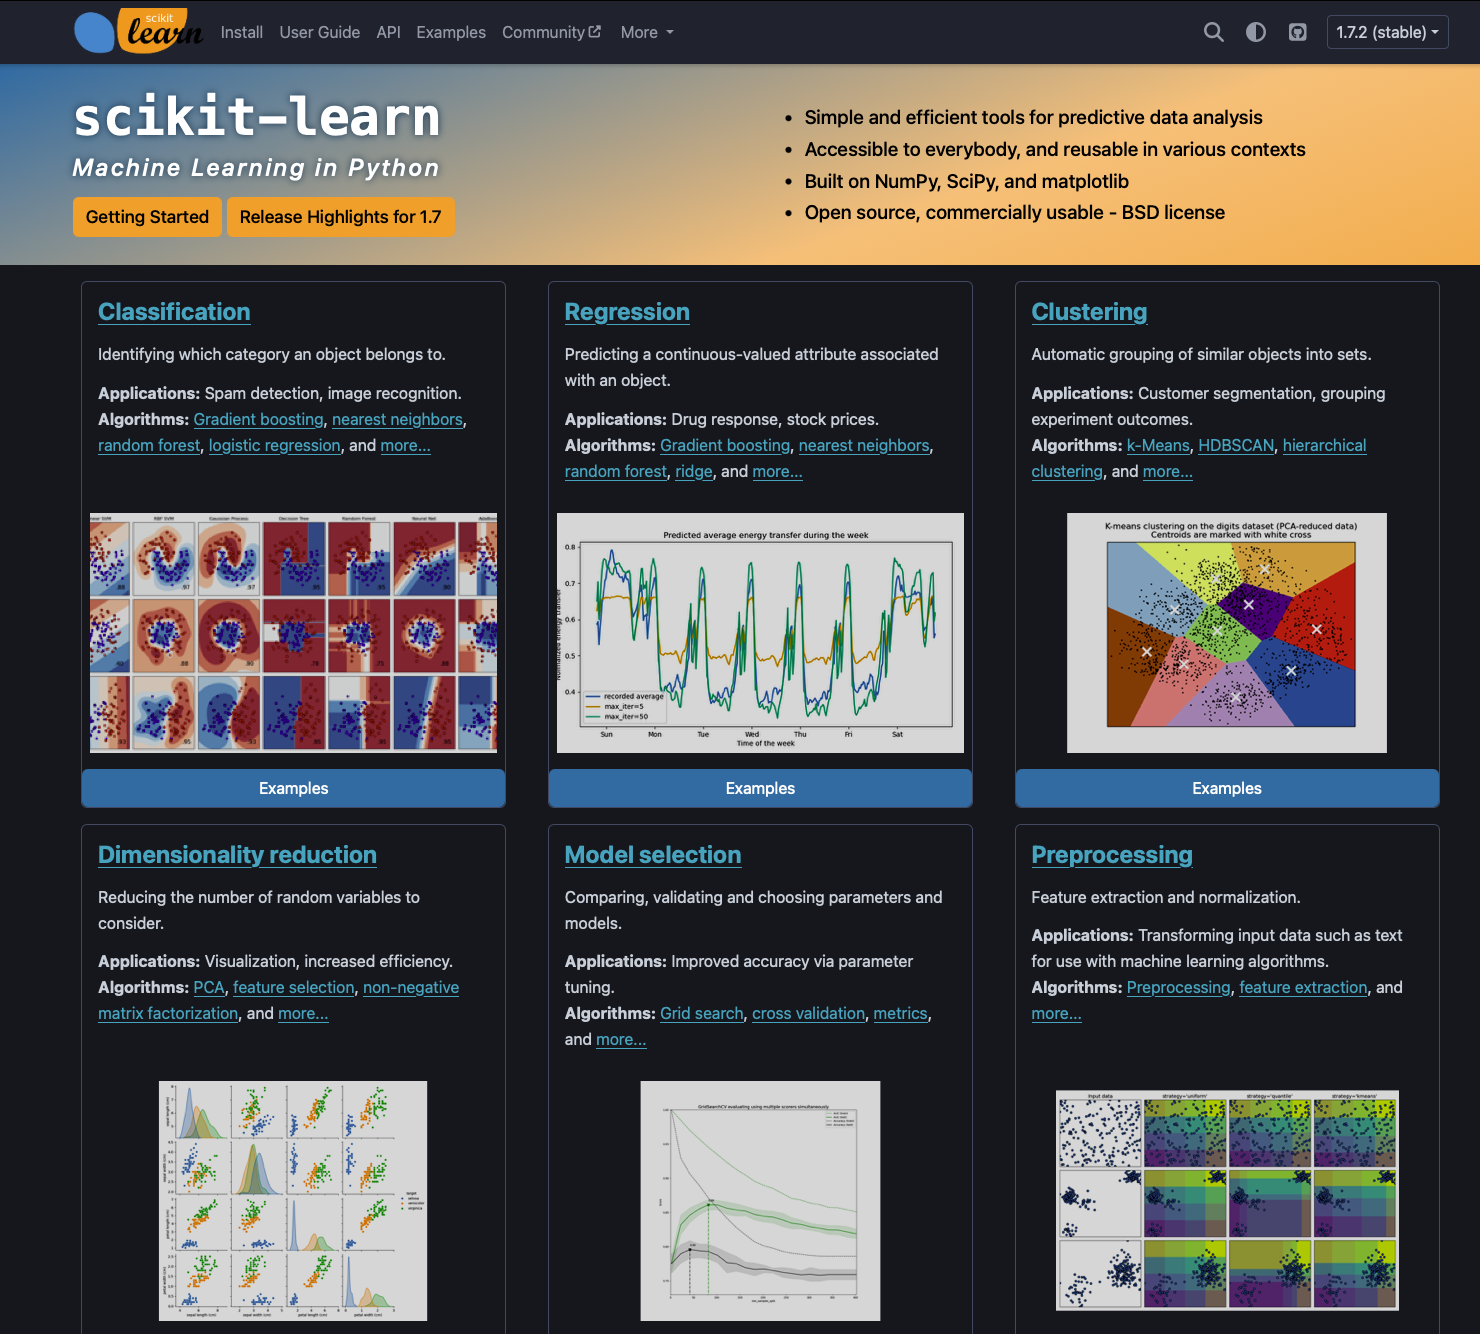

Let's look at the most simple ML model: Linear regression.

## Linear Regression with scikit-learn

We will use experimental data (NIST water pressure vs temperature).

The linear regression model has the form:


$$
y=\sum a_i x_i
$$


and the task here is to *"learn"* the coefficients $a_i$ such that we can have a model that explains as best as possible the relationship between temperature and pressure. Let's look at the data first.

Text(0.5, 1.0, 'Isochoric Water at Density 1000 kg/m3')

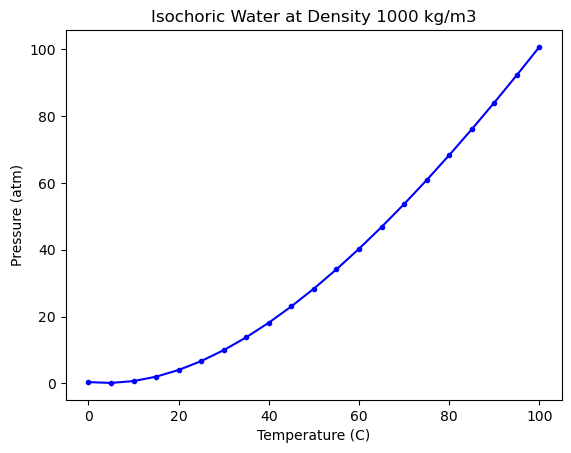

In [1]:
import numpy as np

import matplotlib.pyplot as plt

T, P = np.loadtxt('fluid.txt', delimiter='\t',
                  skiprows = 1, usecols=(0, 1),
                  unpack=True)

plt.plot(T, P, 'b.-')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3")

### Your first ML regression using scikit-learn

### Splitting the data into training and test data

Scikit learn has a bunch of useful functions to preprocess your data. One of them is to split your dataset so you can train and test/validate your model. Let's do this.

In [2]:
from sklearn.model_selection import train_test_split

X = np.array([T**3, T**2, T, T**0]).T
y = P

(X_train, X_test,
 y_train, y_test) = train_test_split(X, y,
                                     test_size=0.2,
                                     shuffle=True,
                                     random_state=42)

Wait, why did i do the following?

In [3]:
X = np.array([T**3, T**2, T, T**0]).T

This is called **feature engineering**: Transforming raw inputs into a form that makes the relationship easier for the model to capture. We got our raw temperature measurements, we looked at the data, and we created a feature vector X that is a realization of $T^0, T^1, T^2, T^3$. This is very common in ML tasks. Sometimes, this task is straightforward, after inspecting the features and the targets/outputs.

What we got here? Let's take a look.

In [4]:
X_train.shape, X_test.shape

((16, 4), (5, 4))

In [5]:
y_train.shape, y_test.shape

((16,), (5,))

Let's look at a plot that shows which points were "randomly" selected as training/test.

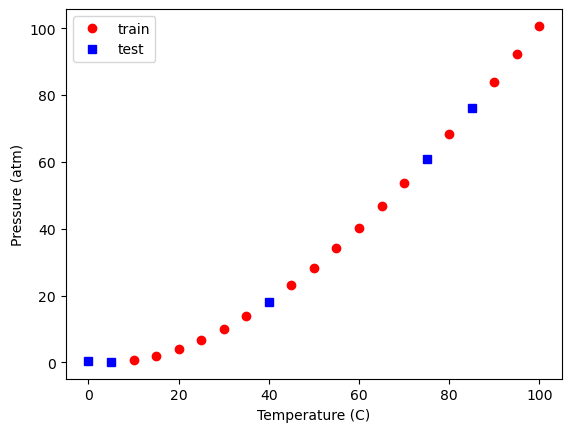

In [6]:
plt.plot(X_train[:, 2], y_train, 'ro',
         X_test[:, 2], y_test, 'bs')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.legend(['train', 'test'])

You will have the same thing since we used the same random seed. If you change it to a different value, you will have a different set of points.

Let's now train our linear regression model. In scikit-learn, this is avery simple task, thanks to its consistent and robust syntax:

In [7]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X_train, y_train)
model.coef_

array([-4.03111876e-05,  1.48141559e-02, -7.18950227e-02,  0.00000000e+00])

Let's take a look at our model predictions, the training data and the test data.

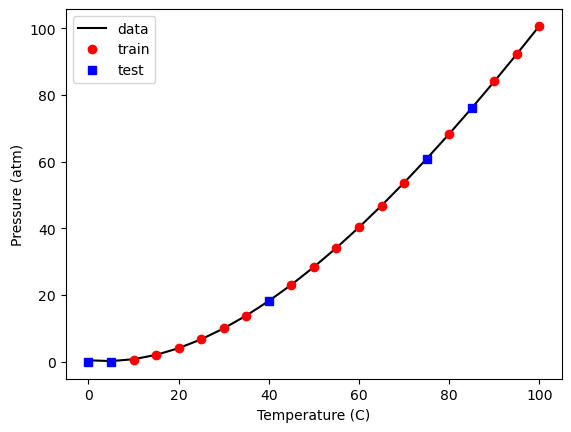

In [8]:
plt.plot(T, P, 'k-',
         X_train[:, 2], model.predict(X_train), 'ro',
         X_test[:, 2], model.predict(X_test), 'bs')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.legend(['data', 'train', 'test'])

what about the metrics regarding how good the model is? `model.score`!

In [9]:
model.score(X_train, y_train)

0.9999974771711627

Note that this is merely a polynomial model, so you should not use it for extrapolation. Although it was fitted using a library that implies machine learning was employed, there are no physical principles incorporated into this model. It shows incorrect behavior at both low and very high temperatures:

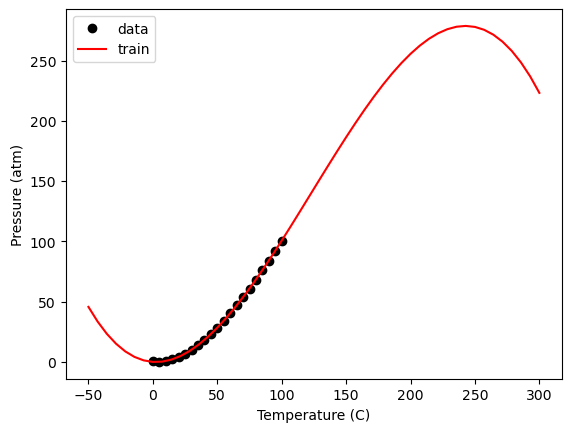

In [10]:
Tex = np.linspace(-50, 300)
Xex = np.array([Tex**3, Tex**2, Tex, Tex**0]).T

plt.plot(T, P, 'ko',
         Xex[:, 2], model.predict(Xex), 'r-')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.legend(['data', 'train', 'test'])

Within the data range, it is a reasonable estimation. Let's take a look at the residual errors.

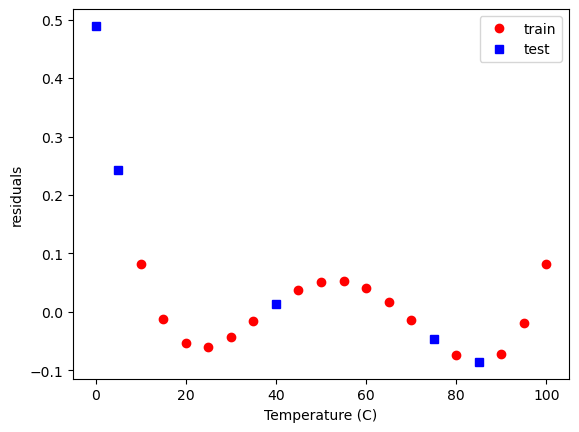

In [11]:
plt.plot(X_train[:, 2], y_train - model.predict(X_train), 'ro',
         X_test[:, 2], y_test - model.predict(X_test), 'bs')
plt.xlabel('Temperature (C)')
plt.ylabel('residuals')
plt.legend(['train', 'test'])

Where is the training here? When we call `.fit` in scikit-learn, for the linear regression model, it is solving the [least squares problem](https://en.wikipedia.org/wiki/Least_squares) for you. Depending on the model we are training in sklearn, it will have a different optimization problem/curve fitting.

## Regularization

Up to now, we’ve seen how to fit models by minimizing the **sum of squared errors** between predictions and data.  
But a few important questions remain:

- **Which inputs (features) should we be using?**  
- **How do we eliminate unnecessary or unhelpful inputs?**

When we manually choose which columns go into our model, that’s **feature engineering**.  
Sometimes, we don’t know in advance which features are useful. One approach is to create a **library of candidate features** (e.g., polynomial expansions) and then let the model decide which ones matter.  

This is where **regularization** comes in.  



### Adding a penalty

Regularization modifies the loss function by adding a penalty on the model coefficients:

$$
\text{Loss} = \sum (y_{\text{pred}} - y_{\text{true}})^2 + \alpha \sum a_i^2
$$

- The first term is the usual squared error (fit to data).  
- The second term penalizes large coefficients.  
- $ \alpha $ controls the strength of the penalty:  
  - **Large $\alpha $:** heavy shrinkage, simpler model, risk of underfitting.  
  - **Small $ \alpha $:** model closer to plain Linear Regression.  



### Ridge vs Lasso

- **Ridge Regression (L2 penalty):**  
  Penalizes the sum squared error loss function. It minimizes the coefficients of non-contributing independent variables.

- **Lasso Regression (L1 penalty):**  
   Penalizes the absolute error loss function. Lasso regression sets the coefficients of an independent variable to 0 if it is not contributing in the behaviour of the dependent variable.



### Lasso

With Lasso, we add the **absolute values of coefficients** to the loss function.  
This encourages sparsity — some features are removed automatically by driving their coefficients to zero.

$$
\text{Loss} = \sum (y_{\text{pred}} - y_{\text{true}})^2 + \alpha \sum |a_i|
$$

- **Advantage:** performs feature selection, helps interpretability.  
- **Trade-off:** choice of  $ \alpha $ is crucial — too large and the model underfits, too small and you get no benefit.  

In [12]:
?linear_model.Lasso

Init signature:
linear_model.Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    squares, solved by the :class:`LinearRegression` object. For numerical
    reasons, using `alpha = 0` with the `Lasso` object is

Let's add some tiny regularization here, $\alpha=10^{-15}$

In [13]:
model = linear_model.Lasso(alpha=1e-15, max_iter=50000)
model.fit(X_train, y_train)
model.coef_

array([-3.95721589e-05,  1.46907001e-02, -6.60781680e-02,  0.00000000e+00])

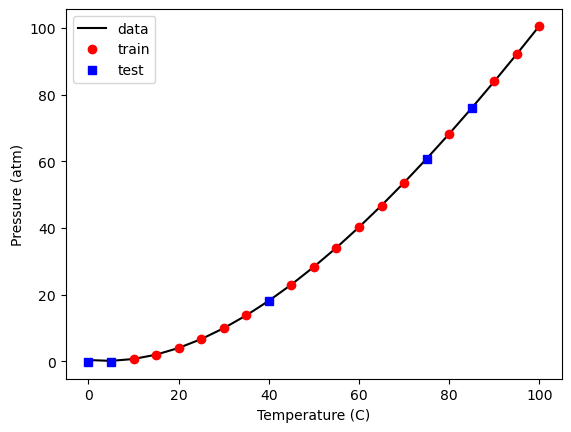

In [14]:
plt.plot(T, P, 'k-',
         X_train[:, 2], model.predict(X_train), 'ro',
         X_test[:, 2], model.predict(X_test), 'bs')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (atm)')
plt.legend(['data', 'train', 'test'])

Now we have to figure out how to find an appropriate value for $\alpha$. First, let's see how $\alpha$ affects the parameters. It is useful to search across a broad range of values, so we use a logspace to look at $\alpha$=1e-15 to $\alpha$=100.

In [15]:
import pandas as pd
alpha = np.logspace(-15, 4, 10)

df = pd.DataFrame()

models = {}

for a in alpha:
    model = linear_model.Lasso(alpha=a, max_iter=50000)
    model.fit(X_train, y_train)
    df = df._append(pd.Series(model.coef_, name=a))
    models[a] = model

df

,0,1,2,3
1.000000e-15,-0.000040,0.014691,-0.066078,0.0
1.291550e-13,-0.000040,0.014691,-0.066078,0.0
1.668101e-11,-0.000040,0.014691,-0.066078,0.0
2.154435e-09,-0.000040,0.014691,-0.066078,0.0
2.782559e-07,-0.000040,0.014691,-0.066078,0.0
3.593814e-05,-0.000040,0.014690,-0.066063,0.0
4.641589e-03,-0.000039,0.014667,-0.064901,0.0
5.994843e-01,-0.000031,0.013303,-0.000000,0.0
7.742637e+01,-0.000029,0.013052,0.000000,0.0
1.000000e+04,0.000100,0.000000,0.000000,0.0


This show that with some regularization, the linear term can be removed, when considering different values of $\alpha$. Let's look at the scores for each model generated

In [16]:
for a, pars in df.iterrows():
    model = models[a]
    print(model.score(X_train, y_train))

0.9999973502351318
0.9999973502351318
0.9999973502351317
0.999997350235111
0.9999973502324528
0.9999973496003345
0.9999972971538174
0.9999785178990158
0.9999565377622336
0.9559621585686436


We can see the effect of different regularization magnitudes on our model too:

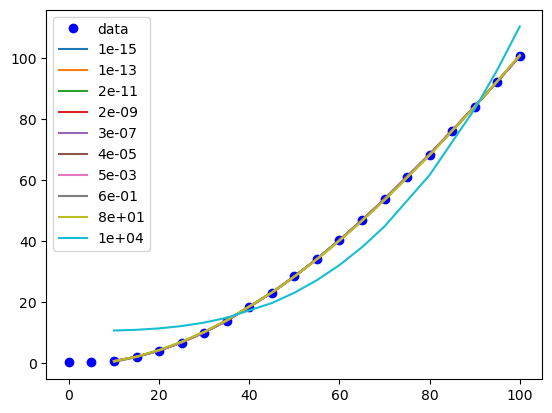

In [17]:
plt.plot(T, P, 'bo', label='data')
for a, pars in df.iterrows():
    model = models[a]
    x, y = X_train[:, 2], model.predict(X_train)
    i = np.argsort(x)
    plt.plot(x[i], y[i], '-', label=f'{a:1.0e}')

plt.legend()

## Decision Trees with scikit-learn

Decision Trees are **nonlinear models** that split the data into regions.



**Comparison with Linear Regression:**
- Trees can capture nonlinearities better.
- However, they can **overfit** if depth is too large.
- Hyperparameter tuning (e.g., `max_depth`) is crucial.

R²: 0.9113662489170847


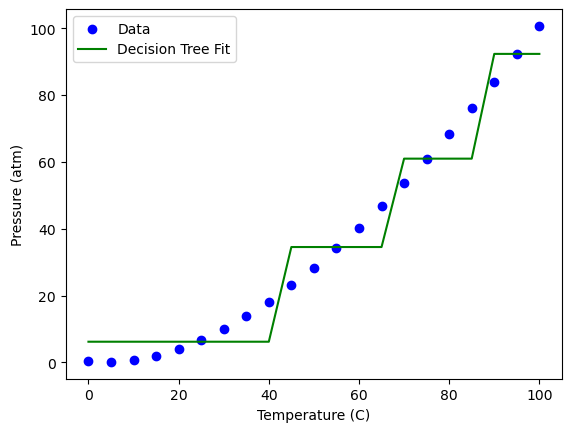

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Fit a regression tree
# tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)


print("R²:", tree.score(X_test, y_test))

# Plot predictions
plt.scatter(T, P, color="blue", label="Data")
plt.plot(T, tree.predict(X), color="green", label="Decision Tree Fit")
plt.xlabel("Temperature (C)")
plt.ylabel("Pressure (atm)")
plt.legend()
plt.show()

Something interesting is happening here... And this is one of the type of situations that looking at a schematic will depict clearly what this ML algorithm is doing, rather than looking at equations. Let's do this:

In [19]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

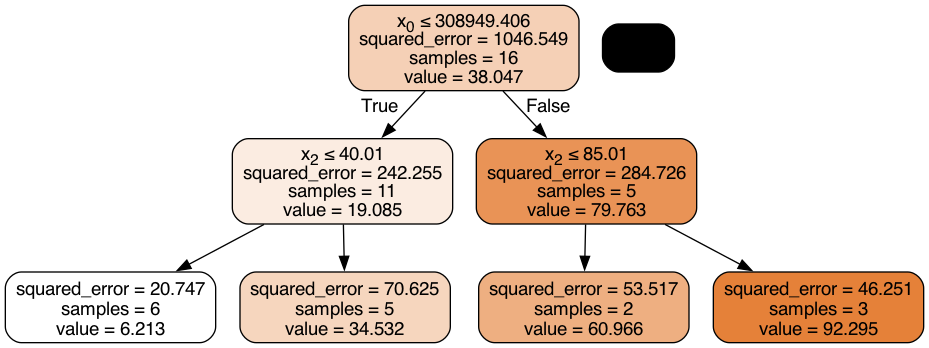

In [20]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

That is pretty cool. The decision tree algorithm is dividing/splitting the dataset based on a boundary which gives the minimum MSE. This is done until every data point is represented by an interval.

In Dr. Laird's group here at CMU we constantly use linear deciision trees as machine learning models, for optimization purposes. See [this](https://www.sciencedirect.com/science/article/pii/S009813542300217X) paper of our research group, for example.

##  Summary

- **ML Categories**: supervised vs unsupervised, classification vs regression.  
- **Pipeline**: feature engineering, train/test split, model selection, validation.  
- **Linear Regression and decision trees**: interpretable, baseline models. Both are flexible, but at the risk of overfitting.
- **Validation is essential** to ensure generalization.

## References

- [Prof. Kitchin's Data science and machine learning in science and engineering course](https://kitchingroup.cheme.cmu.edu/s24-06642/00-introduction/introduction.html) 